In [170]:
#importing the libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [171]:
#importing the data from the csv file into pamdas dataframe
stress_df = pd.read_csv('https://raw.githubusercontent.com/Sofya27/Stress-Level-Prediction/main/Stress-Lysis.csv')

In [172]:
#stress_df

In [173]:
#taking a peek at the dataset
stress_df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [174]:
#renaming columns for easier typing in the future
stress_df = stress_df.rename(columns={'Step count': 'StepCount'})
stress_df = stress_df.rename(columns={'Stress Level': 'StressLevel'})

In [175]:
stress_df.head()

,Humidity,Temperature,StepCount,StressLevel
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [176]:
#looking at the shape of our dataset
stress_df.shape

(2001, 4)

In [177]:
#seeing what features we have
stress_df.columns

Index(['Humidity', 'Temperature', 'StepCount', 'StressLevel'], dtype='object')

In [178]:
#what data types do we have
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     2001 non-null   float64
 1   Temperature  2001 non-null   float64
 2   StepCount    2001 non-null   int64  
 3   StressLevel  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [179]:
#are there any missing values
stress_df.isnull().sum()

Humidity       0
Temperature    0
StepCount      0
StressLevel    0
dtype: int64

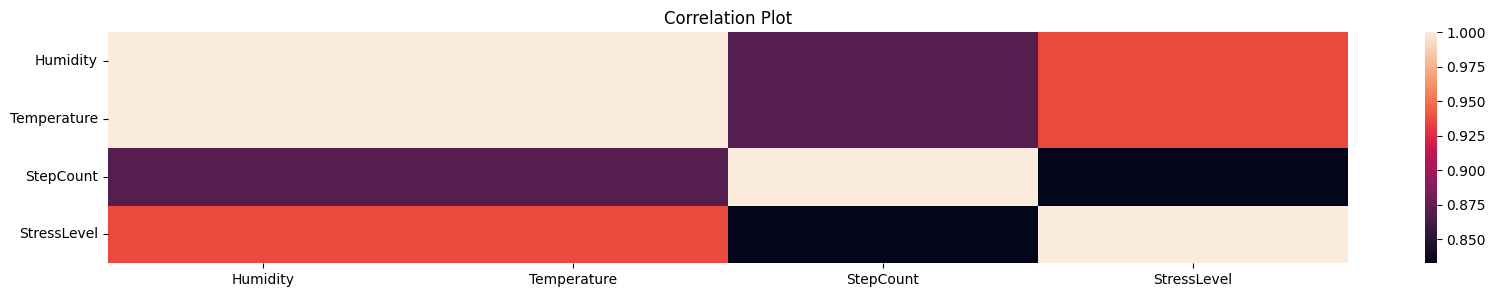

In [180]:
#making a correlation matrix
sns.heatmap(stress_df.corr())
plt.title('Correlation Plot')
plt.show()

In [181]:
#how does humidity vary?
print(stress_df.Humidity.value_counts())

21.33    1
25.49    1
16.42    1
20.54    1
13.90    1
        ..
21.37    1
27.08    1
20.75    1
13.99    1
16.87    1
Name: Humidity, Length: 2001, dtype: int64


In [182]:
#how does temperature vary?
print(stress_df.Temperature.value_counts())

90.33    1
94.49    1
85.42    1
89.54    1
82.90    1
        ..
90.37    1
96.08    1
89.75    1
82.99    1
85.87    1
Name: Temperature, Length: 2001, dtype: int64


In [183]:
#how does step count vary?
print(stress_df.StepCount.value_counts())

123    11
124    11
126    11
128    11
127    11
       ..
97      9
99      9
92      9
95      9
91      2
Name: StepCount, Length: 201, dtype: int64


In [184]:
#how does stress level vary?
print(stress_df.StressLevel.value_counts())

1    790
2    710
0    501
Name: StressLevel, dtype: int64


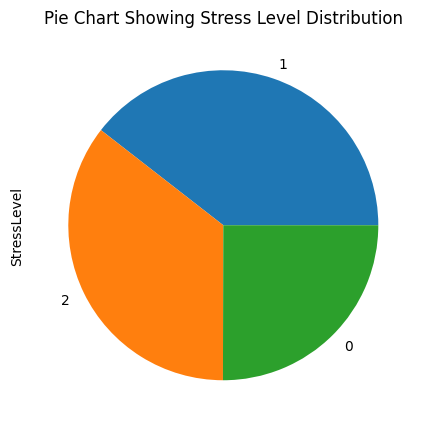

In [185]:
#visualizing the distribution of stress level
data =  stress_df.StressLevel.value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Stress Level Distribution')
plt.show()

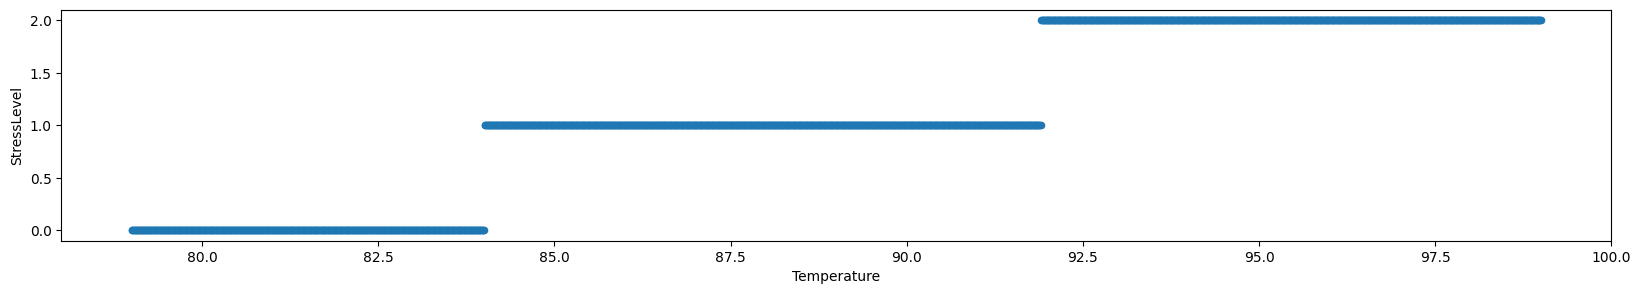

In [186]:
#making scatterplot if stress level depend on temperature - positive relationship
stress_df.plot(kind='scatter', x = 'Temperature', y = 'StressLevel')
plt.show()

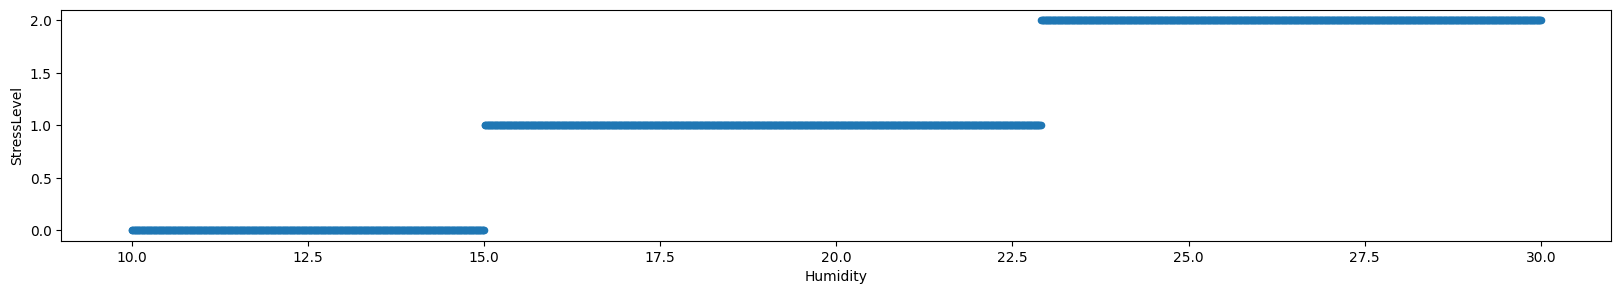

In [187]:
#making scatterplot if stress level depend on humidity - positive relationship
stress_df.plot(kind='scatter', x = 'Humidity', y = 'StressLevel')
plt.show()

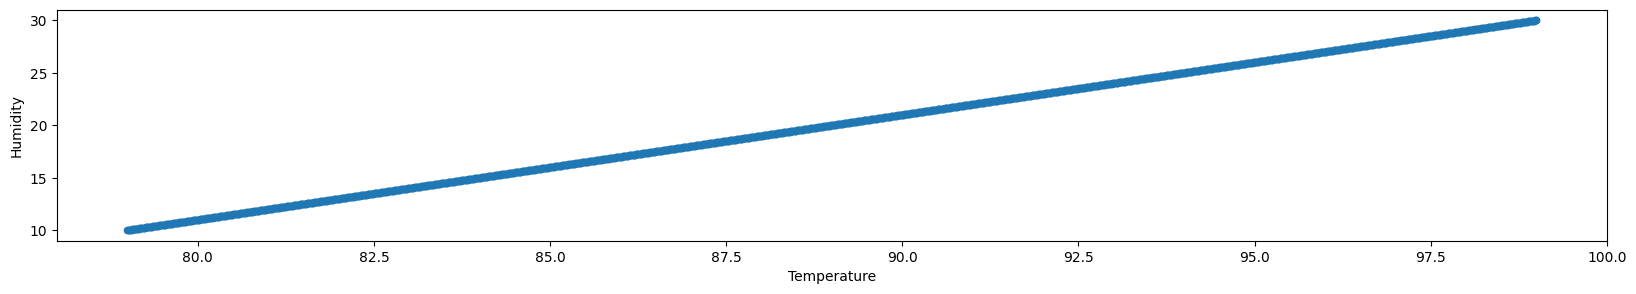

In [188]:
#making scatterplot if humidity depend on temperature - positive relationship
stress_df.plot(kind='scatter', x = 'Temperature', y = 'Humidity')
plt.show()

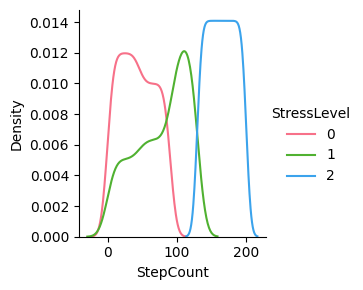

In [189]:
#seeing how stress level looks depending on step count
sns.FacetGrid(stress_df, hue='StressLevel', palette='husl').map(sns.kdeplot, 'StepCount').add_legend()
plt.show()

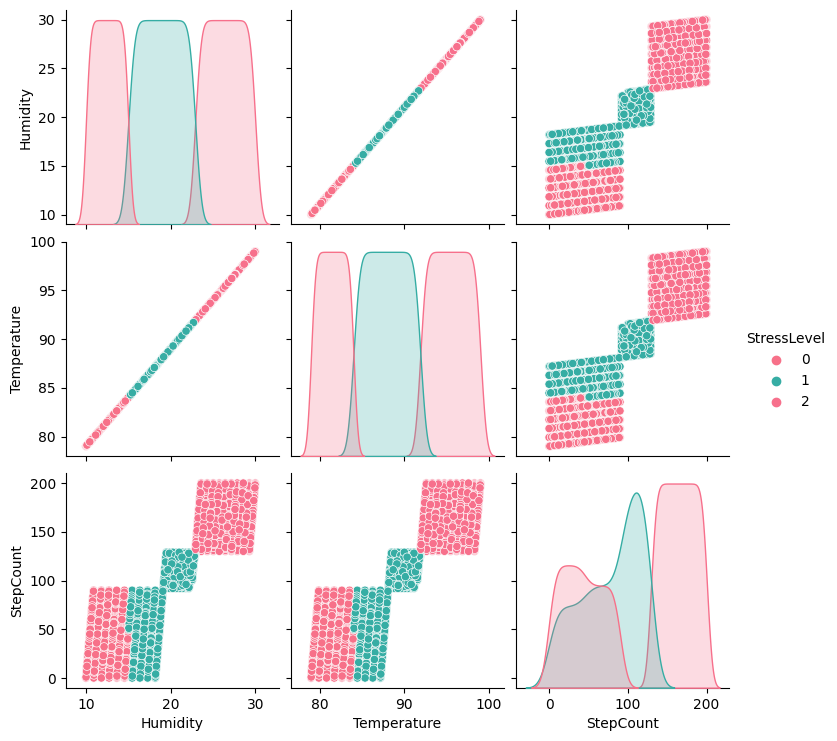

In [190]:
#checking stress levels depending on the all other features
sns.pairplot(stress_df, hue='StressLevel', palette='husl')
plt.show()

In [191]:
#separating the features from the labels
X = stress_df[['Humidity', 'Temperature', 'StepCount']].values
y = stress_df[['StressLevel']].values

In [192]:
#taking a look at X
X

array([[ 21.33,  90.33, 123.  ],
       [ 21.41,  90.41,  93.  ],
       [ 27.12,  96.12, 196.  ],
       ...,
       [ 27.22,  96.22, 135.  ],
       [ 12.46,  81.46,  64.  ],
       [ 16.87,  85.87,  50.  ]])

In [193]:
#taking a look at y
y

array([[1],
       [1],
       [2],
       ...,
       [2],
       [0],
       [1]])

In [194]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [195]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [196]:
#fitting/training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#k nearest neighbors - knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#gaussian naive bayes - gnb model
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

#decision tree - dt model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())

#random forest - rf model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())

#support vector machines - svc model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train.ravel())

SVC()

In [197]:
#5-fold cross validation for knn
k = 5
kf = KFold(n_splits=k)

result_knn = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f'K-Nearest Neighbors - Avg accuracy:{result_knn.mean()}')

K-Nearest Neighbors - Avg accuracy:0.9985714285714286


In [198]:
#5-fold cross validation for gnb
result_gnb = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f'Gaussian Naive Bayes - Avg accuracy:{result_gnb.mean()}')

Gaussian Naive Bayes - Avg accuracy:0.99


In [199]:
#5-fold cross validation for dt
result_dt = cross_val_score(dt, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
print(f'Decision Trees - Avg accuracy: {result_dt.mean()}')

Decision Trees - Avg accuracy: 0.9985714285714286


In [200]:
#5-fold cross validation for rf
result_rf = cross_val_score(rf, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
print(f'Random Forests - Avg accuracy: {result_rf.mean()}')

Random Forests - Avg accuracy: 0.9978571428571428


In [201]:
#5-fold cross validation for svm
result_svm = cross_val_score(svm, X_train, y_train.ravel(), cv=kf, scoring='accuracy')
print(f'Support Vector Machines - Avg accuracy: {result_svm.mean()}')

Support Vector Machines - Avg accuracy: 0.9964285714285716


In [202]:
#stratified 10-fold cross validation for knn
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

result_knn_stratified  = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f'K-Nearest Neighbors (Stratified) - Avg accuracy:{result_knn_stratified.mean()}')

K-Nearest Neighbors (Stratified) - Avg accuracy:0.9985714285714286


In [203]:
#stratified 10-fold cross validation for gnb
result_gnb_stratified = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f'Gaussian Naive Bayes (Stratified) - Avg accuracy:{result_gnb_stratified .mean()}')

Gaussian Naive Bayes (Stratified) - Avg accuracy:0.99


In [204]:
#stratified 10-fold cross validation for dt
result_dt_stratified = cross_val_score(dt, X_train, y_train.ravel(), cv=skf, scoring='accuracy')
print(f'Decision Trees (Stratified) - Avg accuracy: {result_dt_stratified.mean()}')

Decision Trees (Stratified) - Avg accuracy: 0.9985714285714286


In [205]:
#stratified 10-fold cross validation for rf
result_rf_stratified = cross_val_score(rf, X_train, y_train.ravel(), cv=skf, scoring='accuracy')
print(f'Random Forests (Stratified) - Avg accuracy: {result_rf_stratified.mean()}')

Random Forests (Stratified) - Avg accuracy: 0.9992857142857143


In [206]:
#stratified 10-fold cross validation for svm
result_svm_stratified = cross_val_score(svm, X_train, y_train.ravel(), cv=skf, scoring='accuracy')
print(f'Support Vector Machines (Stratified) - Avg accuracy: {result_svm_stratified.mean()}')

Support Vector Machines (Stratified) - Avg accuracy: 0.9978571428571428


In [207]:
#using the model to make predictions on the test dataset - knn
y_pred_knn = knn.predict(X_test)

In [208]:
#using the model to make predictions on the test dataset - gnb
y_pred_gnb = gnb.predict(X_test)

In [209]:
#using the model to make predictions on the test dataset - df
y_pred_dt = dt.predict(X_test)

In [210]:
#using the model to make predictions on the test dataset - rf
y_pred_rf = rf.predict(X_test)

In [211]:
#using the model to make predictions on the test dataset - svm
y_pred_svm = svm.predict(X_test)

In [212]:
#classification report - knn
from sklearn.metrics import classification_report

report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       215

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [213]:
#classification report - gnb
report_gnb = classification_report(y_test, y_pred_gnb)
print(report_gnb)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       134
           1       1.00      0.99      0.99       252
           2       1.00      1.00      1.00       215

    accuracy                           1.00       601
   macro avg       0.99      1.00      0.99       601
weighted avg       1.00      1.00      1.00       601



In [214]:
#classification report - dt
report_dt = classification_report(y_test, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       215

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [215]:
#classification report - rf
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       215

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



In [216]:
#classification report - svm
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       215

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



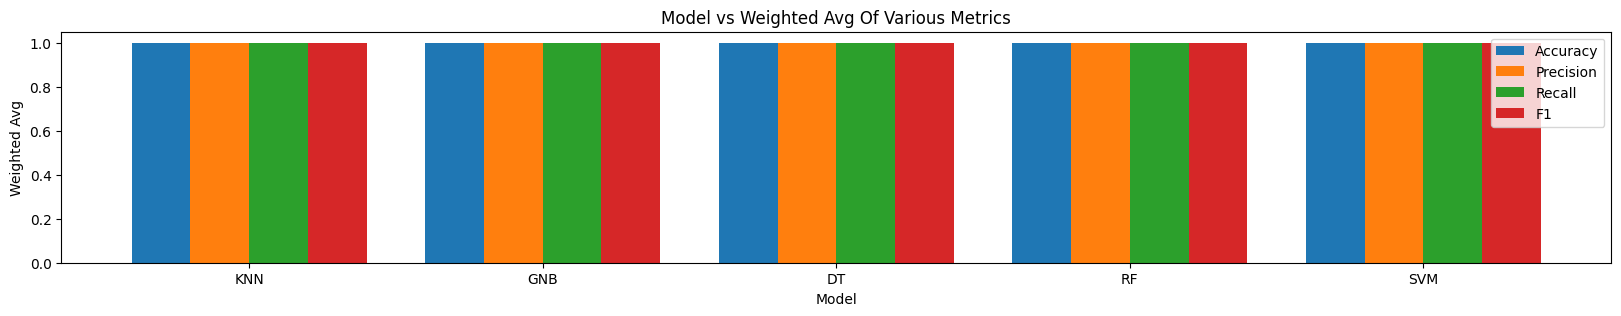

In [217]:
#classification metrics graph
import numpy as np
import matplotlib.pyplot as plt

#Models
X = ['KNN', 'GNB', 'DT', 'RF', 'SVM']

# Collect this information from the classification reports and store them in lists
accuracy = [1.00, 1.00, 1.00, 1.00, 1.00]
precision = [1.00, 1.00, 1.00, 1.00, 1.00]
recall = [1.00, 1.00, 1.00, 1.00, 1.00]
f1 = [1.00, 1.00, 1.00, 1.00, 1.00]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


In [218]:
#saving the trained model:
import pickle
with open('knn_model.pkl', 'wb') as f:
  pickle.dump(knn, f)
with open('stress_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)